In [1]:
import pickle
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
import matplotlib.patches as pat
from scipy import signal
import ruptures as rpt
path = '/home/mullah/Downloads/mperf'
participants = os.listdir(path)
left_right = ['left_final_data_decoded.csv', 'right_final_data_decoded.csv']
data_col = []
total_segments = 0
total_duration = 0
annotated = 0
participants_col = []
duration_col = []
test_col = []
data_col = []
for participant in participants:
    file_list = os.listdir(path+'/'+participant)
    for file in file_list:
        final_path = path+'/'+participant+'/'+file+'/'
        files = os.listdir(final_path)
        for r in range(2):
            try:
                ppg_data = pd.read_csv(final_path+left_right[r],compression='gzip',sep=',',header=None).values
                participants_col.append(participant)
                data_col.append([ppg_data,final_path,r])
#                 temp = np.abs(signal.hilbert(ppg_data[:,4]))
#                 algo = rpt.Pelt(model='l1',min_size=50,jump=20).fit(temp[:175278])
#                 result = np.array(algo.predict(pen=4))-1
#                 print(result.shape)
            except Exception as e:
                # print(e)
                a=1


In [2]:
data_col_final = []
for a in data_col:
    data,path,left_right = a
    if len(data)==0:
        continue
    s = len(data)%100000
    if len(data[:-s])==0:
        continue
    split_array = np.split(data[:-s],round(len(data[:-s])//100000))
    for b in split_array:
        data_col_final.append([b,path,left_right])
print(len(data_col_final))

1050


In [7]:
def get_bkrkpoints(ppg_data,final_path,r):
    temp = np.abs(signal.hilbert(ppg_data[:,4]))
    print('temp')
    algo = rpt.Pelt(model='l1',min_size=50,jump=20).fit(temp)
    result = np.array(algo.predict(pen=4))-1
    print('predicted')
    return final_path,r,list(ppg_data[result,0])

In [8]:
from joblib import Parallel,delayed
final_data_collection = Parallel(n_jobs=35,
                                 verbose=2)(delayed(get_bkrkpoints)(a[0],
                                                         a[1],
                                                         a[2]) for a in data_col_final)

[Parallel(n_jobs=35)]: Using backend LokyBackend with 35 concurrent workers.
[Parallel(n_jobs=35)]: Done  92 tasks      | elapsed:  2.4min
[Parallel(n_jobs=35)]: Done 295 tasks      | elapsed:  8.1min
[Parallel(n_jobs=35)]: Done 578 tasks      | elapsed: 18.8min
[Parallel(n_jobs=35)]: Done 943 tasks      | elapsed: 30.2min
[Parallel(n_jobs=35)]: Done 1050 out of 1050 | elapsed: 36.6min finished


In [10]:
path_col = np.array([a[0]+str(a[1]) for a in final_data_collection])
bk_col = np.array([a[-1] for a in final_data_collection])

In [13]:
uniq_path = np.unique(path_col)
print(uniq_path)

['/home/mullah/Downloads/mperf/17b79ee0-4d3c-44ac-bfea-90b1f0540d4b/20180102/0'
 '/home/mullah/Downloads/mperf/17b79ee0-4d3c-44ac-bfea-90b1f0540d4b/20180102/1'
 '/home/mullah/Downloads/mperf/17b79ee0-4d3c-44ac-bfea-90b1f0540d4b/20180103/1'
 '/home/mullah/Downloads/mperf/17b79ee0-4d3c-44ac-bfea-90b1f0540d4b/20180105/0'
 '/home/mullah/Downloads/mperf/17b79ee0-4d3c-44ac-bfea-90b1f0540d4b/20180111/1'
 '/home/mullah/Downloads/mperf/17b79ee0-4d3c-44ac-bfea-90b1f0540d4b/20180112/0'
 '/home/mullah/Downloads/mperf/17b79ee0-4d3c-44ac-bfea-90b1f0540d4b/20180112/1'
 '/home/mullah/Downloads/mperf/17b79ee0-4d3c-44ac-bfea-90b1f0540d4b/20180115/0'
 '/home/mullah/Downloads/mperf/17b79ee0-4d3c-44ac-bfea-90b1f0540d4b/20180116/1'
 '/home/mullah/Downloads/mperf/17b79ee0-4d3c-44ac-bfea-90b1f0540d4b/20180122/0'
 '/home/mullah/Downloads/mperf/17b79ee0-4d3c-44ac-bfea-90b1f0540d4b/20180122/1'
 '/home/mullah/Downloads/mperf/17b79ee0-4d3c-44ac-bfea-90b1f0540d4b/20180123/0'
 '/home/mullah/Downloads/mperf/17b79ee0-

<IPython.core.display.Javascript object>


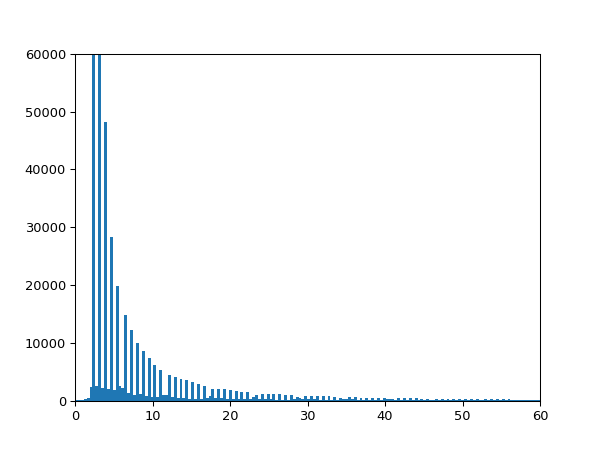

In [37]:
import matplotlib.pyplot as plt
%matplotlib notebook
import pickle
tmp1 = []
for a in uniq_path:
    index = np.where(path_col==a)[0]
    temp_data = bk_col[index]
    data = []
    for b in temp_data:
        data.extend(b)
    data = np.array(data).reshape(-1,1)
    data = data[data[:,0].argsort()]
    tmp = np.diff(data[:,0])/60000
    tmp = tmp[tmp<5]
    tmp1.extend(list(tmp))
plt.hist(np.array(tmp1)*60,bins=800)
plt.ylim([0,60000])
plt.xlim([0,1*60])
plt.show()
#     pickle.dump(data,open(a+'bkpnts.p','wb'))